In [71]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from mpl_toolkits import mplot3d
from pylab import rcParams
from scipy import stats
from sklearn.base import TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/Users/sandipdikshitarts/Desktop/Ca0da Goose.csv")

In [72]:
features = ("stock_id","SocialMedia","Likes","New Likes","Growth","Posts","Comments","C-Rate","Post-Likes","P-Rate","Shares","S-Rate","Engage","price")

In [73]:
df.head()

,Likes,New Likes,Growth,Posts,Comments,C-Rate,Post-Likes,P-Rate,Shares,S-Rate,Engage,price
0,27016,376,0.0141,13,51,1.45,240,6.83,0,0.0,8.28,0.00
1,27427,411,0.0152,11,65,2.15,381,12.63,0,0.0,14.78,86.66
2,28246,819,0.0299,7,26,1.31,203,10.27,0,0.0,11.58,89.11
3,29732,1486,0.0526,12,46,1.29,288,8.07,0,0.0,9.36,79.77
4,32264,2532,0.0852,24,167,2.16,916,11.83,0,0.0,13.99,80.68


In [74]:
target = "price"

In [75]:
target_col = "price"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [77]:
 #number of variables for heatmap
cols = df.corr().nlargest(12, target_col)[target_col].index
cm = df[cols].corr()
cm

,price,Posts,P-Rate,Engage,S-Rate,C-Rate,Shares,Post-Likes,Comments,Growth,New Likes,Likes
price,1.000000,0.159908,0.097909,0.091980,0.075285,0.005156,-0.010727,-0.010850,-0.012030,-0.034238,-0.140241,-0.268750
Posts,0.159908,1.000000,-0.008961,-0.031693,-0.228154,-0.134158,0.177429,0.303291,0.286114,0.035933,-0.112764,-0.242586
P-Rate,0.097909,-0.008961,1.000000,0.998121,0.823206,0.724603,0.374430,0.415009,0.399527,0.280911,0.238245,-0.119511
Engage,0.091980,-0.031693,0.998121,1.000000,0.835005,0.759661,0.366090,0.394979,0.395137,0.303939,0.242728,-0.128715
S-Rate,0.075285,-0.228154,0.823206,0.835005,1.000000,0.543145,0.384303,0.302672,0.325503,0.139692,0.236174,0.028917
C-Rate,0.005156,-0.134158,0.724603,0.759661,0.543145,1.000000,0.128566,0.094347,0.247841,0.548684,0.205495,-0.285034
Shares,-0.010727,0.177429,0.374430,0.366090,0.384303,0.128566,1.000000,0.949667,0.938332,0.002479,0.257773,0.320625
Post-Likes,-0.010850,0.303291,0.415009,0.394979,0.302672,0.094347,0.949667,1.000000,0.916031,0.004166,0.265091,0.323780
Comments,-0.012030,0.286114,0.399527,0.395137,0.325503,0.247841,0.938332,0.916031,1.000000,0.153724,0.355465,0.253286
Growth,-0.034238,0.035933,0.280911,0.303939,0.139692,0.548684,0.002479,0.004166,0.153724,1.000000,0.616227,-0.213391


In [79]:
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)

In [94]:
x_line = df["Posts"].values.reshape(-100,100)
y_line = df["Post-Likes	"].values.reshape(-100,100)
z_line = df["New Likes"].values.reshape(-100,100)

ValueError: cannot reshape array of size 103 into shape (100)

In [80]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.269
Date:                Fri, 27 Nov 2020   Prob (F-statistic):              0.260
Time:                        19:27:33   Log-Likelihood:                -547.10
No. Observations:                 103   AIC:                             1116.
Df Residuals:                      92   BIC:                             1145.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4070     19.760      3.614      0.0

In [83]:
X_std = StandardScaler().fit_transform(X)

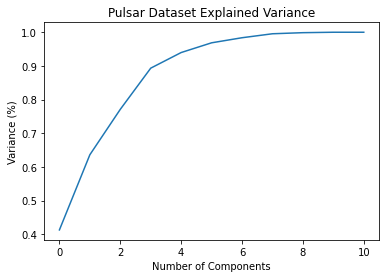

In [84]:
pca = PCA().fit(X_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()


In [85]:
np.cumsum(pca.explained_variance_ratio_)

array([0.41270382, 0.63597357, 0.77096133, 0.89331389, 0.93970824,
       0.96860696, 0.98368608, 0.99548154, 0.99871056, 1.        ,
       1.        ])

In [95]:
pca.explained_variance_ratio_

array([0.41270382])

In [86]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

In [87]:
X_pca_with_constant = sm.add_constant(X_pca)
model = sm.OLS(y, X_pca_with_constant)

In [88]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.05220
Date:                Fri, 27 Nov 2020   Prob (F-statistic):              0.820
Time:                        19:31:39   Log-Likelihood:                -553.73
No. Observations:                 103   AIC:                             1111.
Df Residuals:                     101   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.1064      5.205     12.125      0.0

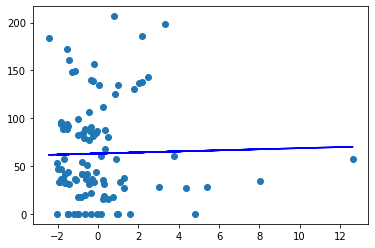

In [89]:
plt.scatter(X_pca, y)
plt.plot(X_pca, results.predict(X_pca_with_constant), color = 'blue')
plt.show()